In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter1d
from astropy.io import fits
from scipy import ndimage

In [2]:
#
# please modify here following your folder structure
#
ifldname = "C:/work/DATA/VenusData/GroundBased/SpeX/20220220/"
ifname = ifldname + "sgd.2022A058.220220.im.00521.a.fits"
ifname

'C:/work/DATA/VenusData/GroundBased/SpeX/20220220/sgd.2022A058.220220.im.00521.a.fits'

In [3]:
hdulist=fits.open(ifname)
hdulist.info()
hdu=hdulist[0]

Filename: C:/work/DATA/VenusData/GroundBased/SpeX/20220220/sgd.2022A058.220220.im.00521.a.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (512, 512)   int16 (rescales to float32)   


In [4]:
# data read
data_5um=65535. - hdu.data
print(np.max(data_5um),np.min(data_5um))

# Quick Look
clip_max = np.max(data_5um) * 0.8
clip_min = np.min(data_5um)

udata_5um = np.array(np.clip((data_5um-clip_min)/(clip_max - clip_min)*255,0,255),dtype='u1')
#plt.imshow(udata_5um)
#plt.show()

22474.0 9909.0


In [5]:
#
# Function for uneven Gaussian smoothing
#
def gsoomth_uneven(data_5um,sig_x,sig_y):
    tmp_s_data_5um = np.zeros_like(data_5um,dtype='f8')
    s_data_5um = np.zeros_like(data_5um,dtype='f8')
    for i in range(512):
        line = data_5um[:,i].astype(np.float64)
        s_line = gaussian_filter1d(line, sig_y)
        tmp_s_data_5um[:,i] = s_line

    for j in range(512):
        line = tmp_s_data_5um[j,:].astype(np.float64)
        s_line = gaussian_filter1d(line, sig_x)
        s_data_5um[j,:] = s_line

    return s_data_5um

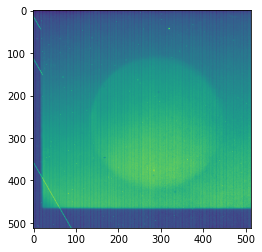

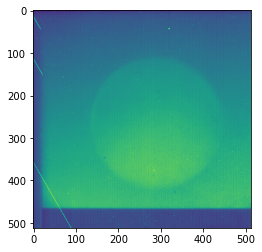

In [6]:
#
# Band pass filtering mainly in X-direction
# 
s_data_5um_1 = gsoomth_uneven(data_5um,1,50)
s_data_5um_5 = gsoomth_uneven(data_5um,10,50)

rl_data_5um = data_5um - (s_data_5um_1 - s_data_5um_5)

# Quick Look
#s_udata_5um = np.array(np.clip(s_data_5um/np.max(s_data_5um)*255,0,255),dtype='u1')
rl_udata_5um = np.array(np.clip((rl_data_5um-clip_min)/(clip_max - clip_min)*255,0,255),dtype='u1')

plt.imshow(udata_5um)
plt.show()

plt.imshow(rl_udata_5um)
plt.show()